In [10]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [11]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [13]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-04", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["FXE","FXY","FXG"]

# Get 5 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

FXE                                        FXG  \
                             open    high       low   close    volume   open   
time                                                                           
2017-01-03 00:00:00-05:00  100.98  101.32  100.4600  101.02  365857.0  45.92   
2017-01-04 00:00:00-05:00  101.45  101.98  101.4101  101.85  461212.0  46.16   
2017-01-05 00:00:00-05:00  102.34  103.09  102.3400  102.96  655319.0  46.21   
2017-01-06 00:00:00-05:00  102.35  102.78  102.2100  102.32  738945.0  46.07   
2017-01-09 00:00:00-05:00  102.32  102.76  102.2000  102.63  254501.0  46.04   

                                                            FXY          \
                            high      low  close  volume   open    high   
time                                                                      
2017-01-03 00:00:00-05:00  46.20  45.8804  46.08  910434  81.70  82.260   
2017-01-04 00:00:00-05:00  46.40  46.1600  46.29  270609  82.21  82.398   
2017-01-05 00:00:00-05:00  46.21  46.0200  46.10  213820  83.08  83.690   
2017-01-06 00:00:00-05:00  46.19  45.8238  46.07  324065  82.69  82.950   
2017-01-09 00:00:00-05:00  46.04  45.7100  45.82  150096  82.90  83.150   

                                                   
                               low  close  volume  
time                                               
2017-01-03 00:00:00-05:00  81.3300  81.89  109502  
2017-01-04 00:00:00-05:00  81.9300  82.19  160174  
2017-01-05 00:00:00-05:00  83.0600  83.47  241918  
2017-01-06 00:00:00-05:00  82.3200  82.41  127052  
2017-01-09 00:00:00-05:00  82.7999  83.13   64221

In [14]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

FXE                                      \
                             open    high       low   close    volume   
time                                                                    
2017-01-03 00:00:00-05:00  100.98  101.32  100.4600  101.02  365857.0   
2017-01-04 00:00:00-05:00  101.45  101.98  101.4101  101.85  461212.0   
2017-01-05 00:00:00-05:00  102.34  103.09  102.3400  102.96  655319.0   
2017-01-06 00:00:00-05:00  102.35  102.78  102.2100  102.32  738945.0   
2017-01-09 00:00:00-05:00  102.32  102.76  102.2000  102.63  254501.0   

                                          FXG                                 \
                          daily_return   open   high      low  close  volume   
time                                                                           
2017-01-03 00:00:00-05:00          NaN  45.92  46.20  45.8804  46.08  910434   
2017-01-04 00:00:00-05:00     0.008216  46.16  46.40  46.1600  46.29  270609   
2017-01-05 00:00:00-05:00     0.010898  46.21  46.21  46.0200  46.10  213820   
2017-01-06 00:00:00-05:00    -0.006216  46.07  46.19  45.8238  46.07  324065   
2017-01-09 00:00:00-05:00     0.003030  46.04  46.04  45.7100  45.82  150096   

                                          FXY                                  \
                          daily_return   open    high      low  close  volume   
time                                                                            
2017-01-03 00:00:00-05:00          NaN  81.70  82.260  81.3300  81.89  109502   
2017-01-04 00:00:00-05:00     0.004557  82.21  82.398  81.9300  82.19  160174   
2017-01-05 00:00:00-05:00    -0.004105  83.08  83.690  83.0600  83.47  241918   
2017-01-06 00:00:00-05:00    -0.000651  82.69  82.950  82.3200  82.41  127052   
2017-01-09 00:00:00-05:00    -0.005427  82.90  83.150  82.7999  83.13   64221   

                                        
                          daily_return  
time                                    
2017-01-03 00:00:00-05:00          NaN  
2017-01-04 00:00:00-05:00     0.003663  
2017-01-05 00:00:00-05:00     0.015574  
2017-01-06 00:00:00-05:00    -0.012699  
2017-01-09 00:00:00-05:00     0.008737

In [15]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002009,1.008469,1.005747,1.000579,0.998535,0.998862,1.002114,1.008177,1.001048,1.002090,...,1.003767,0.992369,1.002803,1.003860,0.999375,1.004102,1.000568,1.007381,1.002171,0.996106
2,1.001916,1.010028,1.005822,1.001276,0.999817,1.001791,1.000548,0.999587,0.998972,1.006186,...,1.002866,0.985053,1.002981,1.000202,1.000827,1.013519,1.001629,1.011021,1.003364,0.997964
3,1.002591,1.008449,1.004466,1.002320,0.994805,1.000323,0.993959,1.005403,1.001876,1.006651,...,0.999357,0.986217,1.003380,1.002556,1.000936,1.014102,1.005881,1.007917,1.000142,1.003945
4,1.003490,1.003886,0.997726,0.998443,0.988060,1.000285,0.992363,1.007582,0.998820,1.007385,...,0.993097,0.985360,0.998711,1.005880,0.999457,1.013583,1.009373,1.010623,1.002720,1.011159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.292370,1.236570,1.128062,1.100658,1.171745,1.146368,1.270682,1.630530,1.350470,1.178007,...,1.172815,1.242334,1.247057,1.208692,1.026263,1.108728,0.872911,1.193628,1.248280,1.194154
1257,1.288937,1.228296,1.132777,1.100176,1.179057,1.148420,1.270798,1.633350,1.346343,1.184374,...,1.175471,1.238773,1.242537,1.204303,1.033603,1.103188,0.868740,1.188408,1.252548,1.192224
1258,1.289677,1.222883,1.134595,1.097378,1.179903,1.144401,1.281020,1.635387,1.354188,1.176938,...,1.169320,1.234444,1.244545,1.211526,1.036417,1.103826,0.869439,1.185499,1.256267,1.191845
1259,1.286064,1.203037,1.140214,1.102727,1.187100,1.144970,1.287050,1.633850,1.353211,1.175129,...,1.169335,1.231442,1.240145,1.212090,1.036770,1.111440,0.869718,1.188779,1.258954,1.180259


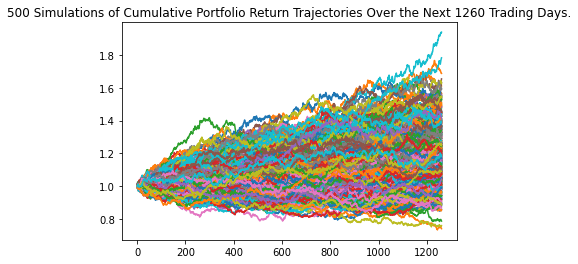

In [16]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

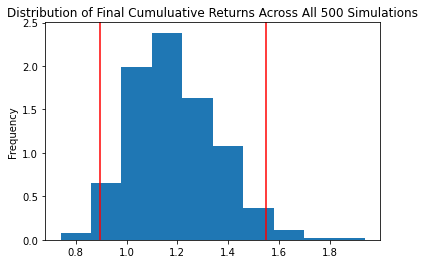

In [17]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              1.188601
std               0.172327
min               0.739467
25%               1.067262
50%               1.173682
75%               1.297906
max               1.939461
95% CI Lower      0.895968
95% CI Upper      1.550481
Name: 1260, dtype: float64
